# SVM

## 1. Hard Margin

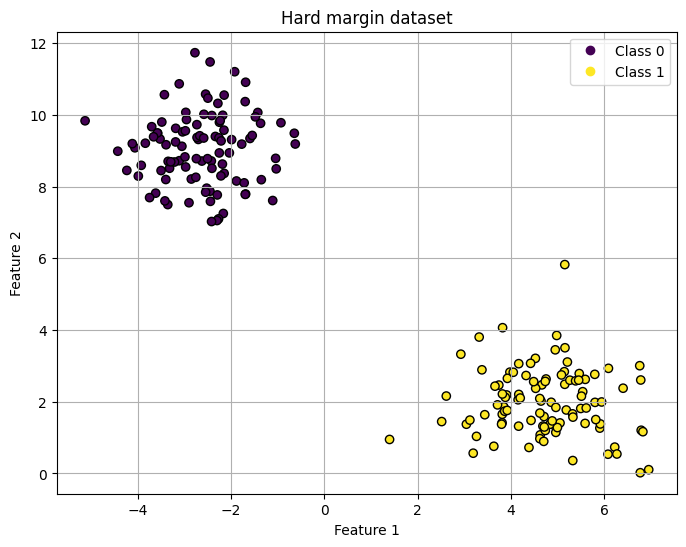

Accuracy: 1.00


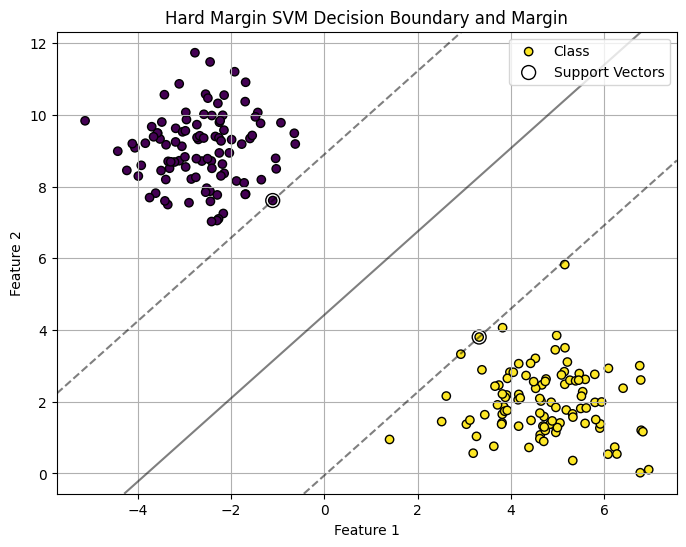

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.0, random_state=42)

# Step 2: Plot the dataset with classes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
# Add legend naming each class as "Class 0" and "Class 1"
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Binary classification data')
plt.grid(True)
plt.show()

# Step 3: Train SVM models with different kernels
hard_margin_svm = SVC(kernel='linear', C=float(10**10)) # Set C to infinity for hard-margin SVM
hard_margin_svm.fit(X, y)

# Step 4: Calculate accuracy
y_pred = hard_margin_svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 5: Plot decision boundary and margin
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM Decision Boundary and Margin')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = hard_margin_svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(hard_margin_svm.support_vectors_[:, 0], hard_margin_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.grid(True)
plt.show()


## 2. Soft margin

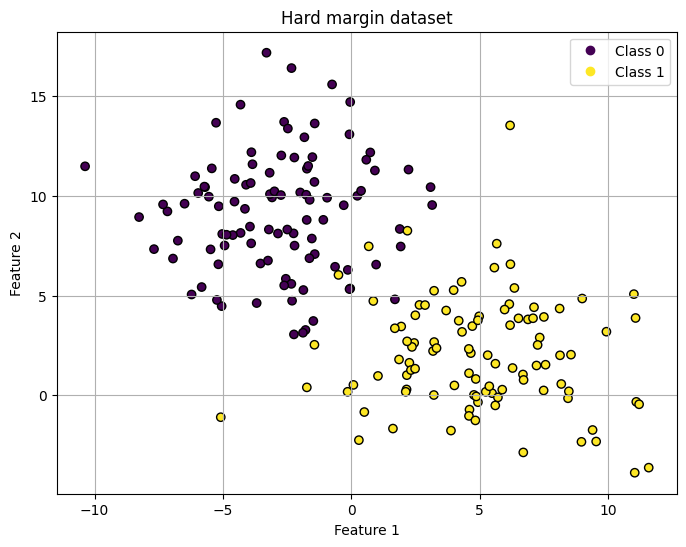

Accuracy: 0.96


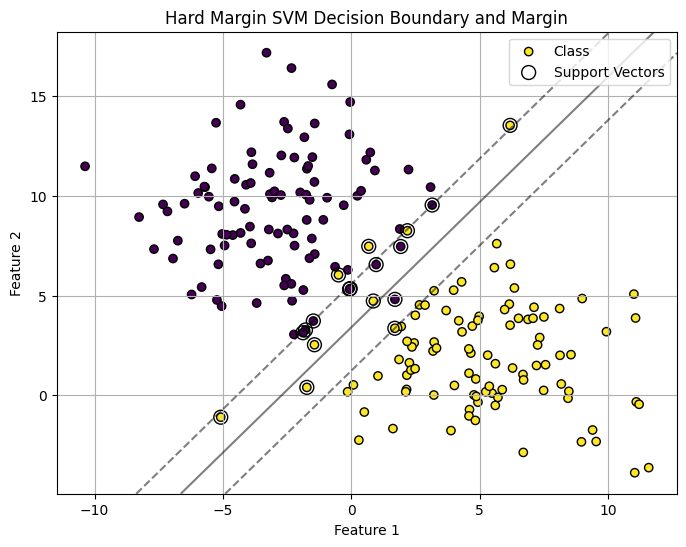

In [4]:
# soft margin
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=3.0, random_state=42)

# Step 2: Plot the dataset with classes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
# Add legend naming each class as "Class 0" and "Class 1"
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Binary classification data')
plt.grid(True)
plt.show()

# Step 3: Train SVM models with different kernels
hard_margin_svm = SVC(kernel='linear', C=1) # Set C small
hard_margin_svm.fit(X, y)

# Step 4: Calculate accuracy
y_pred = hard_margin_svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 5: Plot decision boundary and margin
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM Decision Boundary and Margin')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = hard_margin_svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(hard_margin_svm.support_vectors_[:, 0], hard_margin_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.grid(True)
plt.show()

## 3. Large C & Small C

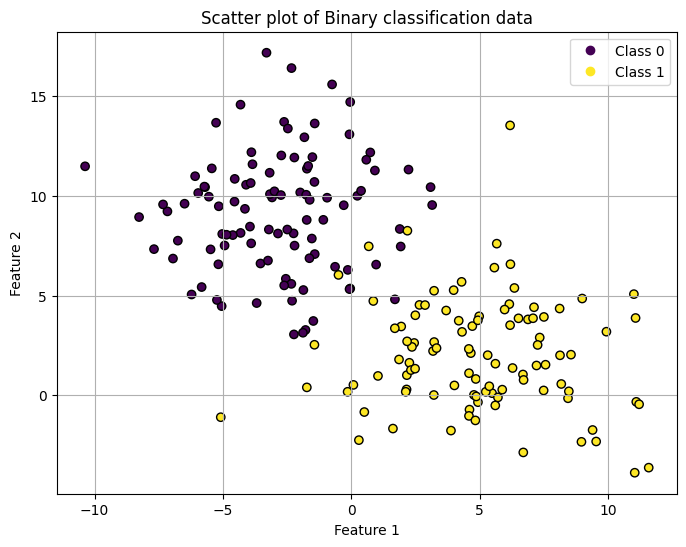

large_c Margin SVM Accuracy: 0.96
small_c Margin SVM Accuracy: 0.97


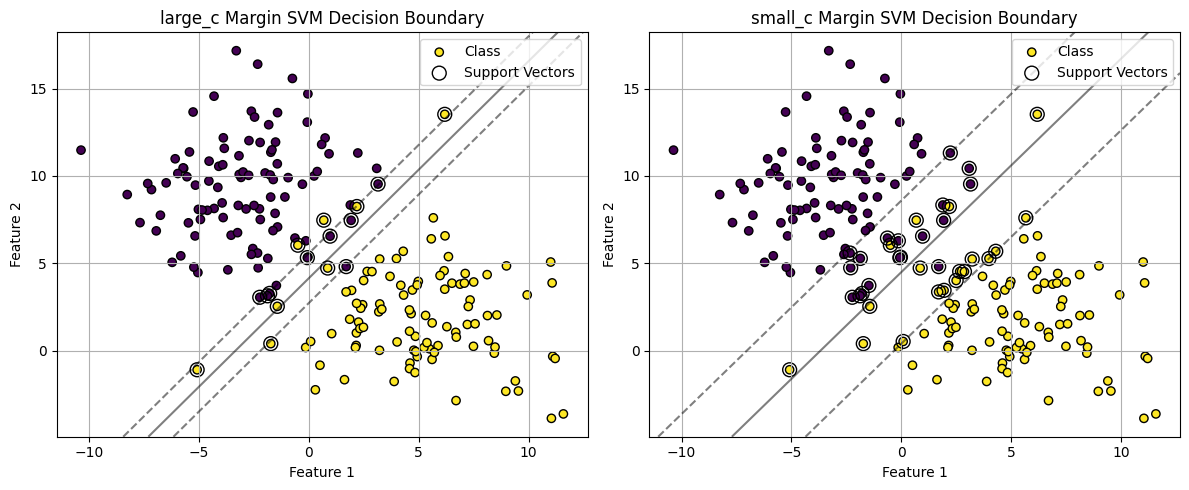

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=3.0, random_state=42)

# Step 2: Plot the dataset with classes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
# Add legend naming each class as "Class 0" and "Class 1"
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Binary classification data')
plt.grid(True)
plt.show()

# Step 3: Train SVM models with different C values
large_c_margin_svm = SVC(kernel='linear', C=100000)  # Large C SVM
small_c_margin_svm = SVC(kernel='linear', C=0.01)  # Small C SVM
large_c_margin_svm.fit(X, y)
small_c_margin_svm.fit(X, y)

# Step 4: Calculate accuracy
y_pred_large_c = large_c_margin_svm.predict(X)
y_pred_small_c = small_c_margin_svm.predict(X)
accuracy_large_c = accuracy_score(y, y_pred_large_c)
accuracy_small_c = accuracy_score(y, y_pred_small_c)
print(f'large_c Margin SVM Accuracy: {accuracy_large_c:.2f}')
print(f'small_c Margin SVM Accuracy: {accuracy_small_c:.2f}')

# Step 5: Plot decision boundaries and support vectors
plt.figure(figsize=(12, 5))

# Plot large_c-margin SVM decision boundary
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('large_c Margin SVM Decision Boundary')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = large_c_margin_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(large_c_margin_svm.support_vectors_[:, 0], large_c_margin_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)

# Plot small_c-margin SVM decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('small_c Margin SVM Decision Boundary')
ax = plt.gca()
Z = small_c_margin_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(small_c_margin_svm.support_vectors_[:, 0], small_c_margin_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 4. Kernel type

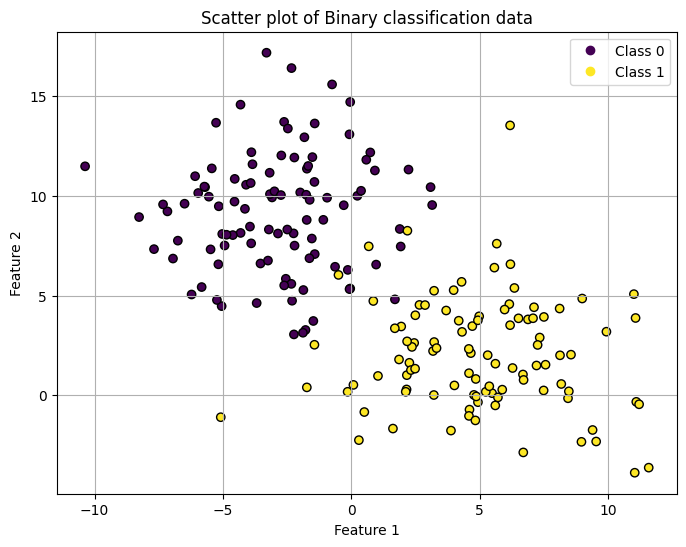

Linear SVM Accuracy: 0.96
Polynomial SVM Accuracy: 0.95
RBF SVM Accuracy: 0.98


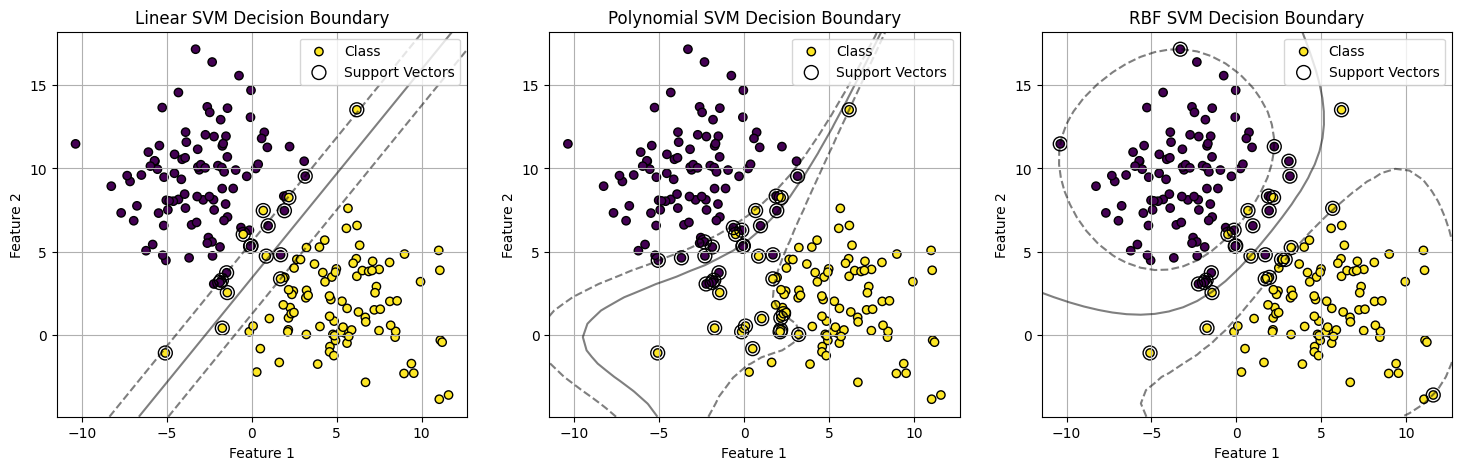

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=3.0, random_state=42)

# Step 2: Plot the dataset with classes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
# Add legend naming each class as "Class 0" and "Class 1"
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Binary classification data')
plt.grid(True)
plt.show()

# Step 3: Train SVM models with different kernels and fixed C=1
linear_svm = SVC(kernel='linear', C=1)
poly_svm = SVC(kernel='poly', degree=3, C=1)
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1)
linear_svm.fit(X, y)
poly_svm.fit(X, y)
rbf_svm.fit(X, y)

# Step 4: Calculate accuracy
y_pred_linear = linear_svm.predict(X)
y_pred_poly = poly_svm.predict(X)
y_pred_rbf = rbf_svm.predict(X)
accuracy_linear = accuracy_score(y, y_pred_linear)
accuracy_poly = accuracy_score(y, y_pred_poly)
accuracy_rbf = accuracy_score(y, y_pred_rbf)
print(f'Linear SVM Accuracy: {accuracy_linear:.2f}')
print(f'Polynomial SVM Accuracy: {accuracy_poly:.2f}')
print(f'RBF SVM Accuracy: {accuracy_rbf:.2f}')

# Step 5: Plot decision boundaries and support vectors
plt.figure(figsize=(18, 5))

# Plot linear SVM decision boundary
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = linear_svm.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Fill the positive and negative regions with different colors
# ax.contourf(XX, YY, Z, colors=['skyblue', 'lightcoral'], alpha=0.2)  # Color both sides differently
ax.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)

# Plot polynomial SVM decision boundary
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Polynomial SVM Decision Boundary')
ax = plt.gca()
Z = poly_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# ax.contourf(XX, YY, Z, colors=['skyblue', 'lightcoral'], alpha=0.2)  # Color both sides differently
ax.scatter(poly_svm.support_vectors_[:, 0], poly_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)

# Plot RBF SVM decision boundary
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF SVM Decision Boundary')
ax = plt.gca()
Z = rbf_svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(rbf_svm.support_vectors_[:, 0], rbf_svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)


## 5. Large Gamma & Small Gamma

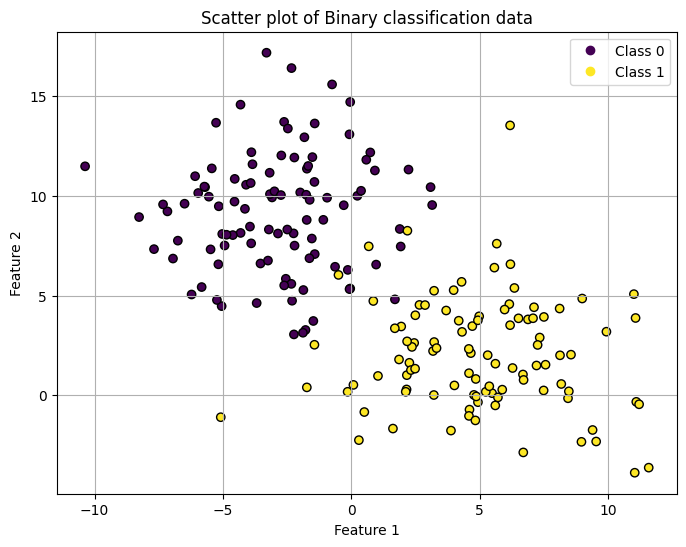

Large Gamma RBF SVM Accuracy: 1.00
Small Gamma RBF SVM Accuracy: 0.99


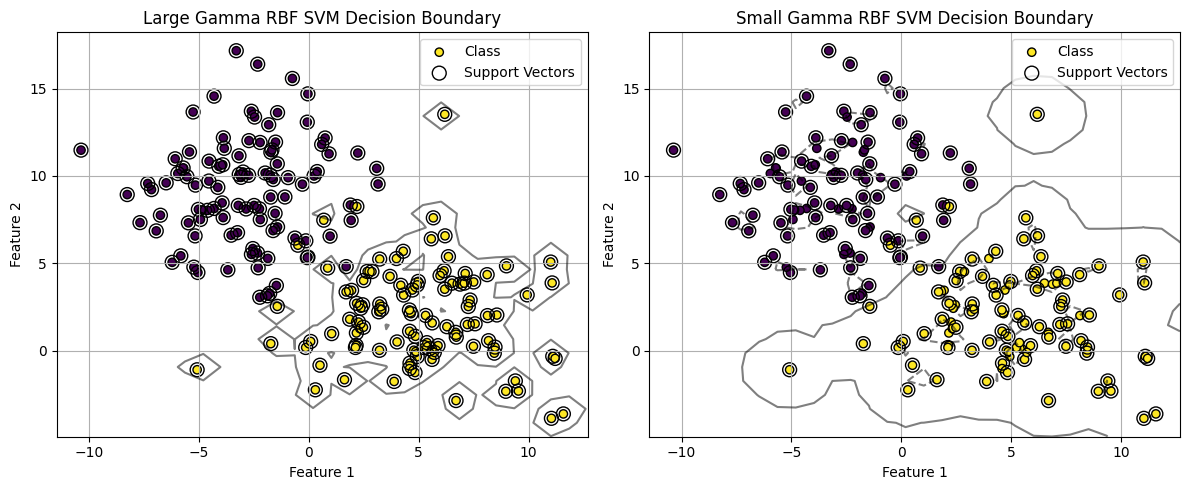

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=3.0, random_state=42)

# Step 2: Plot the dataset with classes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
# Add legend naming each class as "Class 0" and "Class 1"
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Binary classification data')
plt.grid(True)
plt.show()

# Step 3: Train SVM models with different gamma values and fixed C=1
rbf_svm_large_gamma = SVC(kernel='rbf', gamma=10, C=1)  # Large gamma
rbf_svm_small_gamma = SVC(kernel='rbf', gamma=1, C=1)  # Small gamma
rbf_svm_large_gamma.fit(X, y)
rbf_svm_small_gamma.fit(X, y)

# Step 4: Calculate accuracy
y_pred_large_gamma = rbf_svm_large_gamma.predict(X)
y_pred_small_gamma = rbf_svm_small_gamma.predict(X)
accuracy_large_gamma = accuracy_score(y, y_pred_large_gamma)
accuracy_small_gamma = accuracy_score(y, y_pred_small_gamma)
print(f'Large Gamma RBF SVM Accuracy: {accuracy_large_gamma:.2f}')
print(f'Small Gamma RBF SVM Accuracy: {accuracy_small_gamma:.2f}')

# Step 5: Plot decision boundaries and support vectors with different gamma values
plt.figure(figsize=(12, 5))

# Plot large gamma RBF SVM decision boundary
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Large Gamma RBF SVM Decision Boundary')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rbf_svm_large_gamma.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(rbf_svm_large_gamma.support_vectors_[:, 0], rbf_svm_large_gamma.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)

# Plot small gamma RBF SVM decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Small Gamma RBF SVM Decision Boundary')
ax = plt.gca()
Z = rbf_svm_small_gamma.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(rbf_svm_small_gamma.support_vectors_[:, 0], rbf_svm_small_gamma.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 6. Hyperparameter tuning

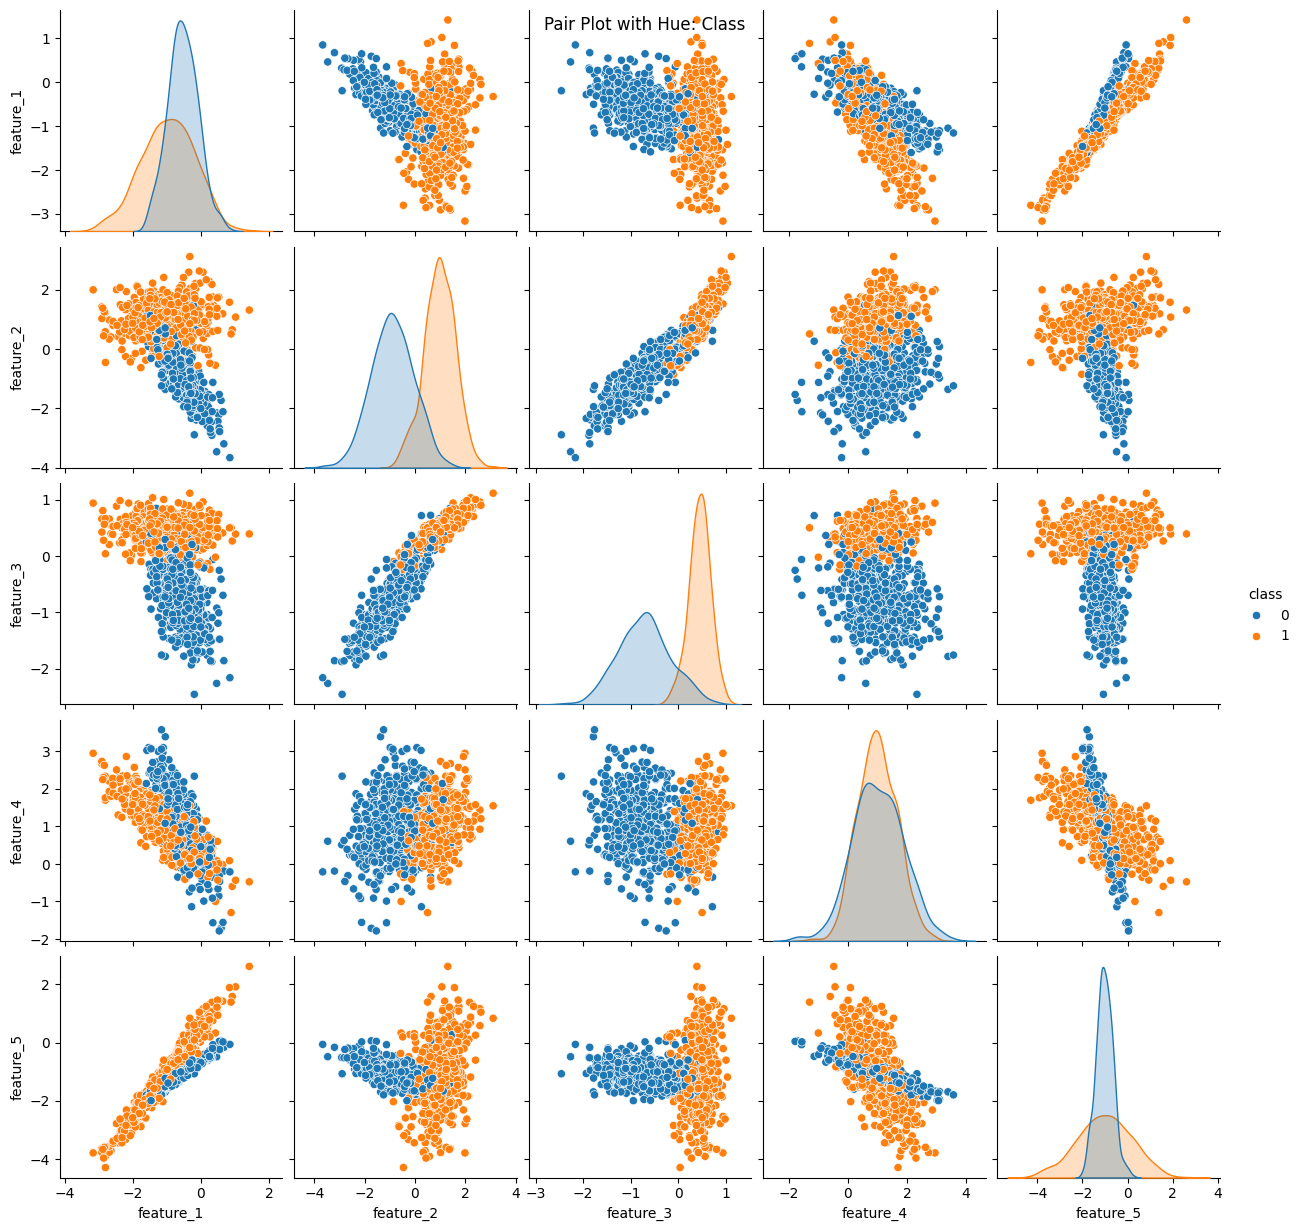

Best Hyperparameters: {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Mean Accuracy on Train CV Data: 0.95
Classification Report on test:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       109
           1       0.92      0.98      0.95        91

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



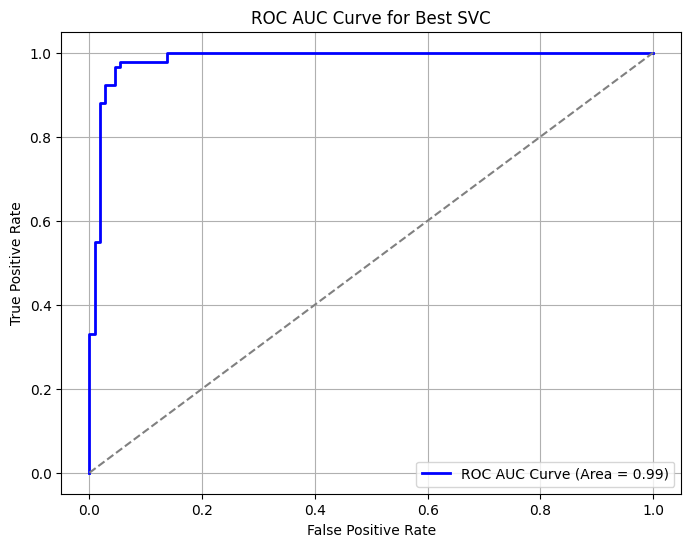

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Step 1: Generate synthetic dataset and plot pair plot
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_clusters_per_class=1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
df['class'] = y
sns.pairplot(df, hue='class')
plt.suptitle('Pair Plot with Hue: Class')
plt.show()

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline with scaling and SVC, and find best hyperparameters using GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
param_grid = {'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [0.1, 0.01, 0.001, 0.0001], 'svc__kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 4: Print the best hyperparameters and mean accuracy on train CV data
best_svc = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

cv_mean_accuracy = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
print(f'Mean Accuracy on Train CV Data: {cv_mean_accuracy:.2f}')

# Step 5: Retrain SVC with the best hyperparameters on the entire training data
best_svc.fit(X_train, y_train)

# Step 6: Evaluate the model on test data and print classification report
y_pred = best_svc.predict(X_test)
print('Classification Report on test:')
print(classification_report(y_test, y_pred))

# Step 7: Plot ROC AUC curve
y_pred_proba = best_svc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC Curve (Area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Best SVC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## 7. SVR

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the SVR model
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 19671.99


In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create SVR model
svr = SVR()

# Perform GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train the SVR model with the best hyperparameters
best_svr = SVR(**best_params)
best_svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_svr.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Mean Squared Error (MSE): 118.60
